Nonlinear Regression Part 2
=========================

<div class="overview-this-is-a-title overview">
<p class="overview-title">Overview</p>
<p>Questions</p>
    <ul>
        <li> How can I perform statistically robust non-linear regression in a Jupyter notebook?</li>
    </ul>
<p>Objectives:</p>
    <ul>
        <li> Import data from a csv file
        <li> Create a function based on the equation to be fitted
        <li> Generate the best-fit curve with parameters and statistical descriptors
        <li> Create plots of the data
    </ul>
</div>

## Data Fitting
In an earlier module, we used the `linregress` function from the scipy.stats library to perform linear regression. This is sufficient for a least squares linear fit to the data. Python contains tools that also enable us to fit data to an equation that we have defined, with two or more paramaters. So it is ideal for nonlinear curve fitting to the Michaelis-Menten equation.

In this module, we will use some familiar tools: importing csv data into a pandas dataframe and plotting results using the matplotlib.pyplot library. We will also create a function based on the Michaelis-Menten equation. The exciting part is to learn to fit the data to the function using `curve_fit` from scipy.optimize.

Here are the steps in our process:

1. Import the libraries and functions that you need, including curve_fit from scipy.optimize.
1. Set up a pandas dataframe from the MM_data.csv file you saved from the previous module.
1. Create your independent and dependent variables for curve fitting.
1. Create a function for the equation you want to fit. The function should accept as inputs the independent variable(s) and all the parameters to be fit.
1. Use the function curve_fit from the scipy.optimize library to fit your data.
1. Extract the fit parameters from the output of curve_fit.
1. Use your function to calculate y values using your fit model to see how well your model fits the data.
1. Graph your original data and the fit equation.

In [3]:
# Import the libraries and functions that you need, including curve_fit from scipy.optimize.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## The Michaelis-Menten equation

The Michaelis-Menten equation (which is probably very familiar to you) describes kinetics for enzyme-catalyzed reactions. We will use the simplest version of the equation, based on initial reaction velocities with a single substrate.

In our equation,  there are two parameters, V$_{max}$ (maximum velocity) and K$_m$ (the Michaelis constant, which equals the substrate concentration at half maximal velocity), an independent variable, \[S\] = substrate concentration, and a dependent variable, V$_i$, the initial velocity.

$$
V_i = \frac{V_{max} * [S]}{K_m + [S]}
$$

We will define the two parameters and two variables for our equation:

- Vmax = the maximum velocity
- Km = the Michaelis constant
- SubConc = substrate concentration
- Vi = initial velocity

In [4]:
# Set up a pandas dataframe from the MM_data.csv file you saved from the previous module.
# create the filehandle
datafile = os.path.join('data', 'MM_data.csv')

# import the data
rates_df = pd.read_csv(datafile)

# inspect the data to make sure you have substrate concentrations and initial velocities
rates_df.head()

,pNPP (mM),slopes,initial velocities
0,20.0,0.514091,34.272718
1,10.0,0.503140,33.542678
2,7.0,0.470435,31.362310
3,4.0,0.417021,27.801416
4,2.0,0.342445,22.829652


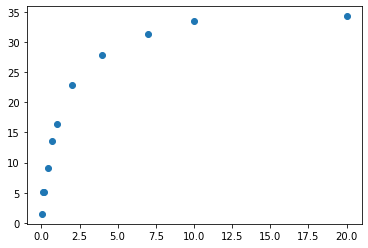

In [5]:
# Create your independent and dependent variables for curve fitting.
ydata = rates_df['initial velocities']
xdata = rates_df['pNPP (mM)']

# Inspect your data to make sure it looks like a Michaelis-Menten plot
plt.plot(xdata, ydata, 'o', label='data')

## Creating Functions

To this point we have called a number of functions that are included with python libraries such pandas, numpy and matplotlib. Most code is organized into blocks of code which perform a particular task. These code blocks are called functions. A commercial software package likely has hundreds of thousands or millions of functions. Functions break up our code into smaller, more easily understandable statements, and also allow our code to be more modular, meaning we can take pieces and reuse them. In general, each function should perform only one computational task. 

In Python, the following syntax is used to declare a function:

```python
def function_name(independent_variable, parameter1, parameter2):
    ** function body code **
    return value_to_return
```

Functions are defined using the `def` keyword, followed by the name of the function. The function may have independent variable(s) and parameters which are passed to it; these are in parenthesis following the function name. You then add a colon after the parentheses. This causes the function body code to indent in a Jupyter notebook coding cell. In certain cases, a function may have no parameters as well. Most (though not all) functions return some type of information. It is important to note here that defining a function does not execute it.

Now we will create a function for the Michaelis-Menten equation.

In [6]:
# Create a function for the equation you want to fit. The function should accept 
# as inputs the independent variable(s) and all the parameters to be fit.

def MM(SubConc, Vmax, Km):
    Vi = Vmax * SubConc/(Km + SubConc)
    return Vi

# Test the function to see if it produces the expected output

MM(rates_df['pNPP (mM)'], 100, 1)

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNPP (mM), dtype: float64

In [7]:
ydata = rates_df('initial velocities') # Common errors and how to read them

TypeError: 'DataFrame' object is not callable

In the previous cell, we received an error message that resulted when we used parentheses by mistake rather than square brackets in our attempt to assign a series from a dataframe to a variable. The error message is

```python
TypeError: 'DataFrame' object is not callable
```

The term `callable` here refers to something that happens with a function.

Here are two very useful sources when you encounter errors: [Stack Overflow](https://stackoverflow.com) and [GeeksforGeeks](https://www.geeksforgeeks.org). In fact, if you just paste your error in quotes (e.g., "TypeError: 'DataFrame' object is not callable") into a search engine, you are likely to find hits from both sources.

## Using curve_fit
The syntax for the curve_fit function from scipy.optimize is
```python
popt, pcov = curve_fit(function, xdata, ydata)
```
| Term | Signficance |
| :----: | :---- |
| popt | optimized parameters |
| pcov | a 2D matrix of the covariance for the curve fit |
| curve_fit | the function from scipy.optimize |
| function | the function that curve_fit will use for fitting the data |
| xdata | a data array for the independent variable |
| ydata | a data array for the dependent variable |

You can learn much more about `curve_fit` in the online documentation for [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

Let's review the function, `MM`, that we defined above, to clearly distinguish the data, variables and parameters associated with `curve_fit` from those associated with `MM`.

```python
def MM(SubConc, Vmax, Km):
    Vi = (Vmax * SubConc)/(Km + SubConc)
    return Vi
```

You need to pass three pieces of data to `MM` to predict the initial velocity for an enzyme-catalyzed reaction: the substrate concentration, and values for $V_{max}$ and $K_m$.

scipy.optimize.curve_fit() can then fit the data to the `MM` function you have defined. In an earlier module, there was a discussion of different ways to linearize data so that linear regression could be used, for example, taking logs of the molecular weights of protein standards to plot versus relative migration for an SDS-PAGE gel. With curve_fit, you can do a least squares regression fit for data that demonstrate nonlinear relationships.

In [8]:
# Use the function curve_fit to fit your data.
popt, pcov = curve_fit(MM, xdata, ydata)

## Extracting the output from curve_fit
There are two outputs from curve_fit - popt and pcov. These are typical names that help to point to the contents of the variable, but you can choose any variable name you like.
1. popt = a list of the optimized parameters. In our case, the two parameters are $V_{max}$ and $K_m$. Remember that python starts counting at 0, so popt[0] = $V_{max}$ and popt[1] = $K_m$. 
1. pcov = an n-dimensional array of the covariance for the parameters, where n is the number of parameters. In our case, n = 2. 

So we can extract the fitted values for $V_{max}$ and $K_m$ just by setting variables equal to them. The covariance matrix can be used to extract standard errors or standard deviations for each of the parameters. In our case, we will calculate one standard deviation for each parameter. Note that we use two numpy functions (sqrt and diag) to calculate the standard deviation values from the 2D matrix for pcov.

In [9]:
# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print('Vmax for this reaction:', Vmax, '+/-', stdev[0])
print('Km for this reaction:', Km, '+/-', stdev[1])

Vmax for this reaction: 36.65734834390893 +/- 0.6749595215280199
Km for this reaction: 1.1926322406324839 +/- 0.08042268476177239


## Review of f string printing

It is unlikely that you will want to have your values printed out to more than 10 decimal places, which is the default when python prints floats. There are a number of ways to get around this that include truncation or rounding, but we are going to look at a very useful tool - [f string printing](https://realpython.com/python-f-strings/). Here is the syntax for an f string print statement:

```python
print(f'a string you want to print that may contain {variables in curly brackets}')
```
Variables of type float can also be assigned precision using this syntax:

```python
print(f'Vmax for this reaction: {Vmax:.2f}')
```

Since Vmax is in curly brackets, the print statement will insert the value for the variable, Vmax, at that point in the print statement. Vmax is followed by `:.2f` which directs the print statement to print the value of Vmax to 2 decimal places. We will now use f string printing to control the precision on the values for our parameters.

In [18]:
print(f'Vmax for this reaction: {Vmax:.2f} +/- {stdev[0]:.2f}')

Vmax for this reaction: 36.66 +/- 0.67


<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Exercise</p>
    <p> Print the value for K<sub>m</sub> +/- one standard deviation to three decimal places. </p>

```{admonition} Solution 
:class: dropdown

```python
print(f'Km for this reaction: {Km:.3f} +/- {stdev[1]:.3f}')
```
    
</div>

## Plotting the data
At this point, you want to compare your plotted data with the curve based on the parameters from curve_fit. We'll do this in two stages. First, we'll use the `MM` function to calculate y values using your fit model to see how well your model fits the data. 

We will use matplotlib.pyplot (please note the import statement at the top of this notebook) to create and annotate this plot. Our first plot will contain two sets of data: 

1. the actual data for initial velocity vs. substrate concentration from our pandas dataframe
2. the fitted data using the parameters generated by curve_fit. 

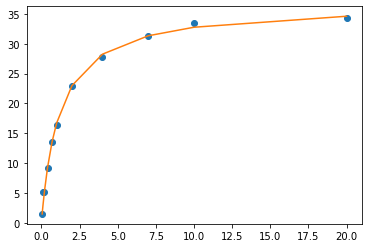

In [9]:
fit_y = MM(xdata, Vmax, Km) # calculates y values based on the curve_fit parameters
# using your fit model to see how well your model fits the data.

# Graph your original data and the fit equation
plt.plot(xdata, ydata, 'o', label='data') # the experimental data
plt.plot(xdata, fit_y, '-', label='fit') # the fit equation

## Smoothing the plot
You probably noticed that the curve appears a bit disjointed, because it provides values only at the selected concentrations of the substrate. A fit curve based on 1000 x-values will be much smoother. To do this, we first use the numpy linspace function to create a new list of 1000 x-values ranging from the minimum xdata value (using the numpy min function) to the maximum xdata value (using the numpy max function). Then we generate a fit curve using the MM function. We then add the experimental data and the smoothed fit data to the plot. Note that the experimental data is plotted using `'bo'`. This tells matplotlib.pyplot to use blue (`b`) circles (`o`).

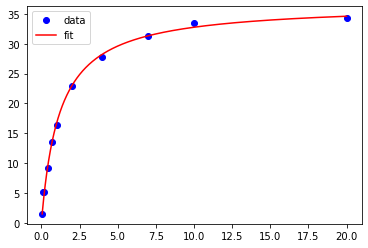

In [23]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000) # x value range with 1000 points
smooth_y = MM(smooth_x, Vmax, Km) # y values for the 1000 points in smooth_x

plt.plot(xdata, ydata, 'bo', label='data') # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = 'fit') # plot of the fit data
plt.legend() # legend added

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Exercise</p>
    <p> Use what you learned in previous modules to label the x-axis and y-axis and to insert the values for $V_{max}$ and $K_m$ with their standard deviations in the white space on the graph. Change the symbol for the substrate concentrations to a red triangle. </p>
    
```{admonition} Solution
:class: dropdown

```python
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000) # x value range with 1000 points
smooth_y = MM(smooth_x, Vmax, Km) # y values for the 1000 points in smooth_x

plt.plot(xdata, ydata, 'bo', label='data') # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = 'fit') # plot of the fit data
plt.legend() # legend added

plt.xlabel('[pNPP] (mM)')  # x-axis label
plt.ylabel('V$_i$ ($\mu$M/min)')  # y-axis label in LaTeX _{595} makes 595 the subscripts
plt.annotate(F'Vmax = {Vmax:.2f} +/- {stdev[0]:.2f}', xy = (7.5, 20))
plt.annotate(F'Km = {Km:.2f} +/- {stdev[1]:.2f}', xy = (7.5, 16))
```
    
</div>

<div class="exercise-this-is-a-title exercise">
<p class="exercise-title">Take Home Exercise</p>
    <p> If you want to dig deeper, you can complete the curve fitting analysis of the chymotrypsin data from the previous module. You may need to adjust some of the details to generate high quality output.</p>
    

```{admonition} Solution
:class: dropdown

```python
# create the filehandle
datafile = os.path.join('data', 'chymo_MM_data.csv')

# import the data
c_rates_df = pd.read_csv(datafile)
c_rates_df.head()
    
# Inspect the data
c_ydata = c_rates_df['Initial Velocities']
c_xdata = c_rates_df['pNPA (mM)']
plt.plot(c_xdata, c_ydata, 'o', label='data')
    
# Non-linear regression with scipy.optimize.curve_fit    
popt, pcov = curve_fit(MM, c_xdata, c_ydata)
Vmax = popt[0]
Km = popt[1]
perr = np.sqrt(np.diag(pcov)) # returns one standard deviation for each parameter
print(f'Vmax for this reaction: {Vmax:.4f} +/- {perr[0]:.4f}')
print(f'Km for this reaction: {Km:.4f} +/- {perr[1]:.4f}')

# Plot the data
smooth_x = np.linspace(np.min(c_xdata), np.max(c_xdata), 1000)
smooth_y = MM(smooth_x, Vmax, Km)
plt.plot(c_xdata, c_ydata, 'r^', label='data')
plt.plot(smooth_x, smooth_y, 'b', label = 'fit')
plt.legend()
```
    
</div>

## Common errors 

Python is very particular about the use of parentheses (), square brackets [], and braces or curly brackets {}. 

Parentheses are used to pass arguments to functions. For example, 
```python
Vi = MM(xdata, Vmax, Km)
```

Square brackets are used to create lists. In this example, the square brackets are used to call a series from the rates_df dataframe.
```python
xdata = rates_df['pNPP (mM)']
```

Curly brackets or braces are used to create dictionaries or sets. 
```python
a_dict = {'Brady': 12, 'Evans': 13}
```
You can learn more about [dictionaries in the python online manual](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict). 

Here are two very useful sources when you encounter errors: [Stack Overflow](https://stackoverflow.com) and [GeeksforGeeks](https://www.geeksforgeeks.org). In fact, if you just paste your error in quotes (e.g., "TypeError: 'DataFrame' object is not callable") into a search engine, you are likely to find hits from both sources.